# Redes neuronales convolucionales aplicadas a clasificación de curvas de luz

Curvas de luz del proyecto MANTRA https://arxiv.org/abs/2006.13163

Red basada en https://github.com/juramaga/ML_relampago/blob/master/Labs/Lab3/Lab3.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import gdown
url='https://drive.google.com/uc?id=1wKw4oGbI_iYZazmx6EXPZ86AA0Nkr3CE'
output = 'file.zip'
gdown.download(url, output,quiet=False)

In [ ]:
!unzip file.zip

In [96]:
means=np.loadtxt('means.txt')

In [97]:
labels=np.loadtxt('labs.txt',dtype='str')

In [98]:
means=means[:,1000-150:1000+150]

Es necesario estandarizar las curvas (para que todas varíen entre 0 y 1) antes de pasárselas a la red.

In [99]:
mx=means.max()
mn=means.min()
cur=(means-mn)/(mx-mn)

Text(0, 0.5, '???')

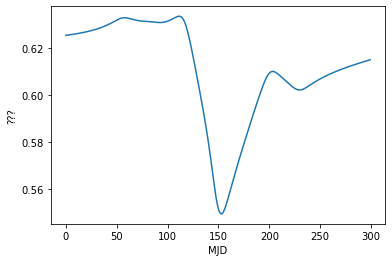

In [100]:
plt.plot(cur[1025])
plt.xlabel('MJD')
plt.ylabel('???')

Pasamos las clases de categóricas a numéricas, ignorando las que son menos comunes ('Other'). Nos quedamos con 6+1 clases.

In [86]:
six_classes=np.array(['AGN','Blazar','CV', 'Flare', 'HPM', 'SN'])

In [87]:
classes=np.asarray([np.arange(len(six_classes))[i==six_classes][0] if i in six_classes else 6 for i in labels ])
seven_classes=np.append(six_classes,'Other')

In [88]:
n_classes=len(seven_classes)

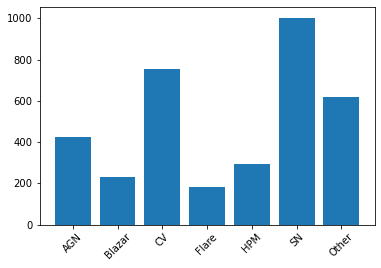

In [89]:
items, counts = np.unique(classes, return_counts=True)
tick_marks=np.arange(n_classes)
plt.bar(items, counts, align='center')
plt.gca().set_xticks(items)
plt.xticks(tick_marks,labels=seven_classes, rotation=45);

Librerías para armar la red.

In [18]:
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten
from sklearn.model_selection import train_test_split

from keras.layers import Conv1D, MaxPooling1D
from sklearn import metrics

2022-03-24 11:58:14.567619: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-24 11:58:14.567655: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [101]:
# Usamos esta función de sklearn para partir los datos (train, test)
X_train,X_test,Y_train,Y_test=train_test_split(cur,classes,test_size=0.33, random_state=40)

Conv1D y Pooling explicado en https://boostedml.com/2020/04/1-d-convolutional-neural-networks-for-time-series-basic-intuition.html

In [121]:
model = Sequential()
model.add(Conv1D(32, 5,input_shape=(X_train.shape[1], 1), kernel_initializer = 'normal'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = (10)))
model.add(Conv1D(64, 5, kernel_initializer = 'normal'))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size = (10)))
#model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(n_classes))
model.add(Activation('softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer = 'rmsprop', metrics = ['accuracy'])

In [122]:
eps=120
history = model.fit(X_train, Y_train, batch_size = 128, epochs = eps,validation_split = 0.2, verbose = 1)

Epoch 1/120
15/15 [==============================] - 1s 23ms/step - loss: 1.8260 - accuracy: 0.2678 - val_loss: 1.7245 - val_accuracy: 0.2696
Epoch 2/120
15/15 [==============================] - 0s 20ms/step - loss: 1.7606 - accuracy: 0.2843 - val_loss: 1.7181 - val_accuracy: 0.2696
Epoch 3/120
15/15 [==============================] - 0s 21ms/step - loss: 1.7527 - accuracy: 0.2843 - val_loss: 1.6985 - val_accuracy: 0.2696
Epoch 4/120
15/15 [==============================] - 0s 21ms/step - loss: 1.7413 - accuracy: 0.2864 - val_loss: 1.6920 - val_accuracy: 0.2739
Epoch 5/120
15/15 [==============================] - 0s 18ms/step - loss: 1.7256 - accuracy: 0.3087 - val_loss: 1.6811 - val_accuracy: 0.2930
Epoch 6/120
15/15 [==============================] - 0s 21ms/step - loss: 1.7057 - accuracy: 0.3305 - val_loss: 1.6465 - val_accuracy: 0.3355
Epoch 7/120
15/15 [==============================] - 0s 20ms/step - loss: 1.6834 - accuracy: 0.3507 - val_loss: 1.6272 - val_accuracy: 0.3376
Epoch 

15/15 [==============================] - 0s 12ms/step - loss: 1.3834 - accuracy: 0.4336 - val_loss: 1.3679 - val_accuracy: 0.4650
Epoch 59/120
15/15 [==============================] - 0s 12ms/step - loss: 1.3858 - accuracy: 0.4394 - val_loss: 1.4230 - val_accuracy: 0.4607
Epoch 60/120
15/15 [==============================] - 0s 13ms/step - loss: 1.3789 - accuracy: 0.4405 - val_loss: 1.4175 - val_accuracy: 0.4480
Epoch 61/120
15/15 [==============================] - 0s 14ms/step - loss: 1.3744 - accuracy: 0.4421 - val_loss: 1.3644 - val_accuracy: 0.4607
Epoch 62/120
15/15 [==============================] - 0s 15ms/step - loss: 1.3787 - accuracy: 0.4373 - val_loss: 1.3680 - val_accuracy: 0.4544
Epoch 63/120
15/15 [==============================] - 0s 14ms/step - loss: 1.3724 - accuracy: 0.4373 - val_loss: 1.3897 - val_accuracy: 0.4501
Epoch 64/120
15/15 [==============================] - 0s 14ms/step - loss: 1.3584 - accuracy: 0.4506 - val_loss: 1.3772 - val_accuracy: 0.4650
Epoch 65/120

15/15 [==============================] - 0s 13ms/step - loss: 1.3089 - accuracy: 0.4671 - val_loss: 1.3703 - val_accuracy: 0.4586
Epoch 116/120
15/15 [==============================] - 0s 12ms/step - loss: 1.3145 - accuracy: 0.4586 - val_loss: 1.3126 - val_accuracy: 0.5265
Epoch 117/120
15/15 [==============================] - 0s 12ms/step - loss: 1.3031 - accuracy: 0.4713 - val_loss: 1.3096 - val_accuracy: 0.4968
Epoch 118/120
15/15 [==============================] - 0s 13ms/step - loss: 1.3201 - accuracy: 0.4628 - val_loss: 1.3222 - val_accuracy: 0.5223
Epoch 119/120
15/15 [==============================] - 0s 14ms/step - loss: 1.2966 - accuracy: 0.4665 - val_loss: 1.3535 - val_accuracy: 0.4607
Epoch 120/120
15/15 [==============================] - 0s 12ms/step - loss: 1.3141 - accuracy: 0.4580 - val_loss: 1.3012 - val_accuracy: 0.5329


Debemos cuidar que el error de validación no supere el error de los test_data.

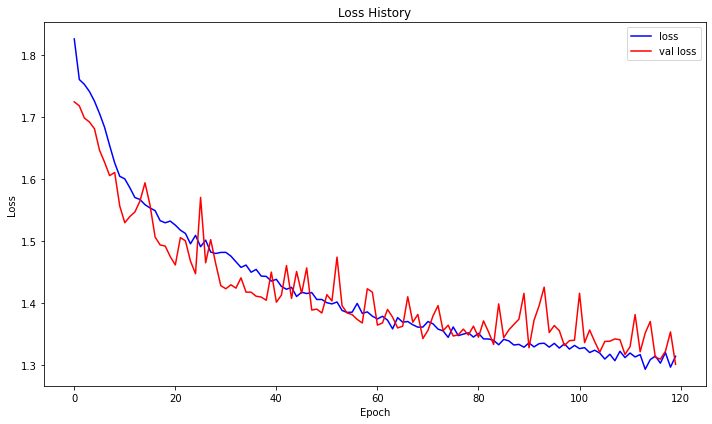

In [123]:
hist = history.history
loss = hist['loss']
val_loss = hist['val_loss']
epochs = np.arange(eps)
fig, axis1 = plt.subplots(figsize=(10,6))
plt.plot(epochs, loss, 'b', label='loss')
plt.plot(epochs, val_loss, 'r', label="val loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss History")
plt.legend(loc='upper right')
plt.tight_layout()

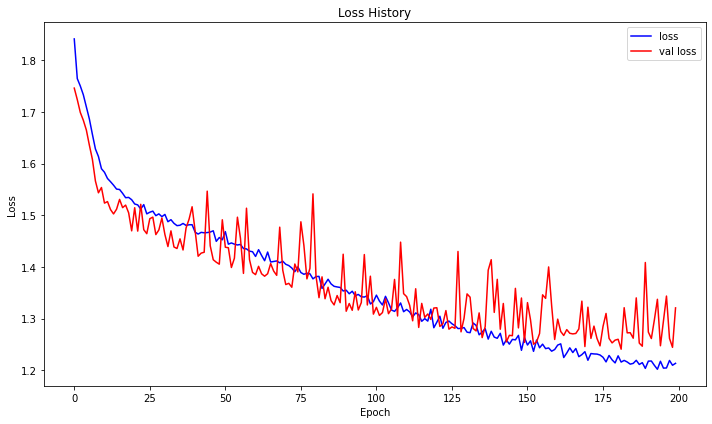

In [287]:
#modelo con 2000 días
hist = history.history
loss = hist['loss']
val_loss = hist['val_loss']
epochs = np.arange(eps)
fig, axis1 = plt.subplots(figsize=(10,6))
plt.plot(epochs, loss, 'b', label='loss')
plt.plot(epochs, val_loss, 'r', label="val loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss History")
plt.legend(loc='upper right')
plt.tight_layout()

Usemos algunas métricas para verificar la calidad del modelo.

In [124]:
Y_pred = model.predict(X_test)
Y_pred_real = []
Y_test_real = []
Y_prob = []
for i in range(len(Y_pred)):
    Y_pred_real.append(np.argmax(Y_pred[i]))
    Y_test_real.append(Y_test[i])
    Y_prob.append(np.max(Y_pred[i]))
print(Y_pred_real[:10])
print(Y_test_real[:10])

[0, 5, 5, 2, 0, 0, 0, 5, 5, 5]
[5, 6, 5, 2, 6, 3, 0, 5, 5, 5]


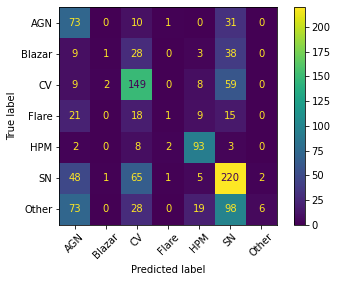

In [125]:
metrics.ConfusionMatrixDisplay.from_predictions(Y_test_real, Y_pred_real)
tick_marks = np.arange(n_classes)
plt.xticks(tick_marks,labels=seven_classes, rotation=45);
plt.yticks(tick_marks,labels=seven_classes );

In [126]:
metrics.precision_score(Y_test_real, Y_pred_real, average='weighted')

0.5023944133052743

In [127]:
metrics.recall_score(Y_test_real, Y_pred_real, average='weighted')

0.4685073339085418

In [128]:
metrics.f1_score(Y_test_real, Y_pred_real, average='weighted')

0.39596504160307266